### Submission: 
Submit your assignment in GITHUB Repository in the form of .ipynb (code must merged to the main branch) Include code, visualization and explanation of each task. 

You can follow these initial steps:
•	Create a GITHUB repository
•	Add your team member as collaborators.
•	Create your separate branch from main.


### Assignment: Analyzing Stock Data

### Background:
You have been provided with a dataset containing historical stock price data for a company. 
Your task is to perform various data analysis tasks using Pandas, NumPy, and Matplotlib to gain insights into the stock's performance.

Dataset: You can use any stock price dataset or create a synthetic dataset for this assignment. The dataset should contain at least the following columns:

Date (representing the trading dates)
Open (the opening price of the stock on that date)
Close (the closing price of the stock on that date)
High (the highest price of the stock during the trading session)
Low (the lowest price of the stock during the trading session)
Volume (the trading volume of the stock on that date)
You can use libraries like yfinance to fetch real stock data or create a synthetic dataset using NumPy.

Tasks:

#### Data Loading and Inspection:
Load the stock price dataset into a Pandas DataFrame.
Display the first 5 rows of the DataFrame.
Check for missing values and handle them if necessary.

#### Data Exploration:
Calculate and display basic statistics (mean, median, standard deviation) for the 'Close' price.
Create a line plot of the 'Close' price over time (use Date on the x-axis).


#### Data Analysis:
Calculate and visualize the moving average of the stock's 'Close' price over a specific window (e.g., 30 days).
Identify and visualize any significant price changes or trends in the stock.
Volume Analysis

#### Analyze the trading volume of the stock:
Calculate the average daily trading volume.
Visualize the trading volume over time.

#### Financial Metrics:
Calculate daily returns for the stock.
Calculate and visualize the cumulative returns of the stock over time.
Calculate and visualize the rolling standard deviation of the daily returns.

#### Correlation Analysis:
Calculate the correlation between the stock's returns and the returns of a market index (e.g., S&P 500).
Visualize the correlation using a scatter plot.

#### Conclusion:
Summarize your findings from the analysis.
Provide insights into the stock's performance and any trends or patterns you observed.


### Data Loading and Inspection:

In [127]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [128]:
data = yf.download('MSFT','2023-01-01','2023-08-31')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.956329,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,227.547348,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,220.803360,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.405609,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,225.580750,27369800
...,...,...,...,...,...,...
2023-08-24,332.850006,332.980011,319.959991,319.970001,319.970001,23281400
2023-08-25,321.470001,325.359985,318.799988,322.980011,322.980011,21684100
2023-08-28,325.660004,326.149994,321.720001,323.700012,323.700012,14808500


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166 entries, 2023-01-03 to 2023-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       166 non-null    float64
 1   High       166 non-null    float64
 2   Low        166 non-null    float64
 3   Close      166 non-null    float64
 4   Adj Close  166 non-null    float64
 5   Volume     166 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.1 KB


In [130]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [131]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.956329,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,227.547348,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,220.803360,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.405609,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,225.580750,27369800


### Data Exploration:

In [132]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02
mean,296.232169,299.418494,293.359457,296.479217,295.459563,2.921089e+07
std,37.051176,37.199462,36.702043,36.818460,37.152327,1.079643e+07
min,223.000000,225.759995,219.350006,222.309998,220.803360,1.250870e+07
25%,260.117508,265.137505,259.427490,263.230003,261.446060,2.240272e+07
50%,306.429993,308.769989,304.000000,305.485001,304.174637,2.657605e+07
75%,331.502495,333.497498,326.427505,328.742508,328.695007,3.187055e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,6.952740e+07


In [133]:
data.describe().loc[['mean','50%','std']]

,Open,High,Low,Close,Adj Close,Volume
mean,296.232169,299.418494,293.359457,296.479217,295.459563,2.921089e+07
50%,306.429993,308.769989,304.000000,305.485001,304.174637,2.657605e+07
std,37.051176,37.199462,36.702043,36.818460,37.152327,1.079643e+07


In [134]:
data.describe().loc[['mean','50%','std'],'Close']

mean    296.479217
50%     305.485001
std      36.818460
Name: Close, dtype: float64

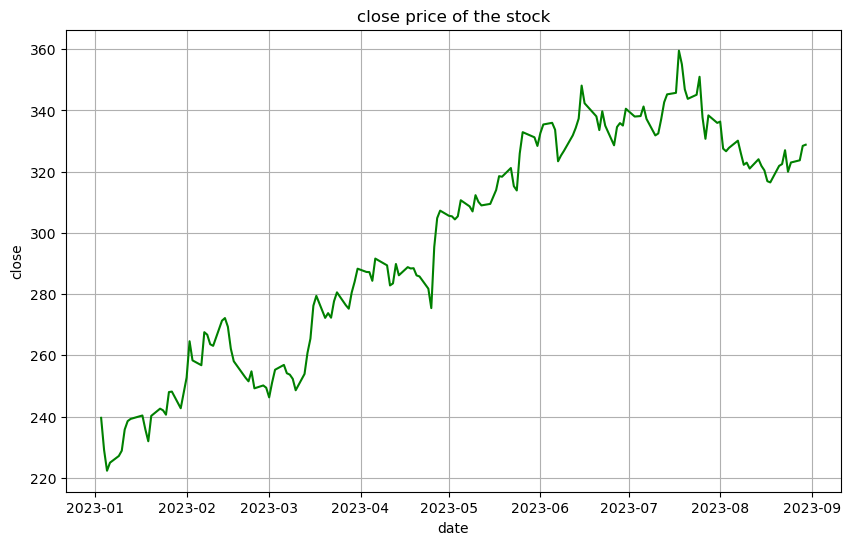

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(data.index,data['Close'], color = 'green')
plt.xlabel('date')
plt.ylabel('close')
plt.title('close price of the stock')
plt.grid(True)
plt.show();

### Data Analysis:

In [136]:
data['moving_avg'] = data['Close'].rolling(30).mean()
data

,Open,High,Low,Close,Adj Close,Volume,moving_avg
Date,,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.956329,25740000,NaN
2023-01-04,232.279999,232.869995,225.960007,229.100006,227.547348,50623400,NaN
2023-01-05,227.199997,227.550003,221.759995,222.309998,220.803360,39585600,NaN
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.405609,43613600,NaN
2023-01-09,226.449997,231.240005,226.410004,227.119995,225.580750,27369800,NaN
...,...,...,...,...,...,...,...
2023-08-24,332.850006,332.980011,319.959991,319.970001,319.970001,23281400,332.220998
2023-08-25,321.470001,325.359985,318.799988,322.980011,322.980011,21684100,331.478999
2023-08-28,325.660004,326.149994,321.720001,323.700012,323.700012,14808500,330.744666


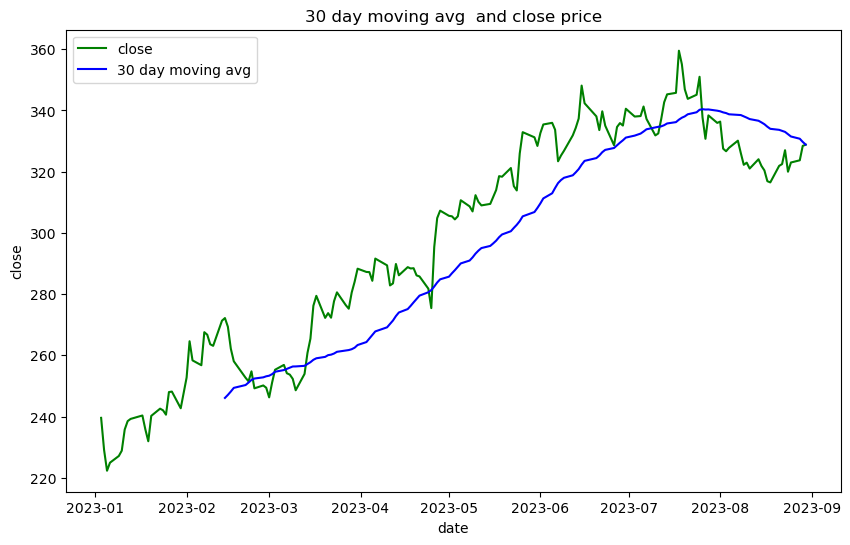

In [137]:
plt.figure(figsize = (10,6))
plt.plot(data.index,data['Close'],color = 'green', label = 'close')
plt.plot(data.index,data['moving_avg'], color = 'blue', label = '30 day moving avg')
plt.xlabel('date')
plt.ylabel('close')
plt.title("30 day moving avg  and close price")
plt.legend()
plt.show;

### Analyze the trading volume of the stock:

In [138]:
data['Volume'].mean()

29210886.74698795

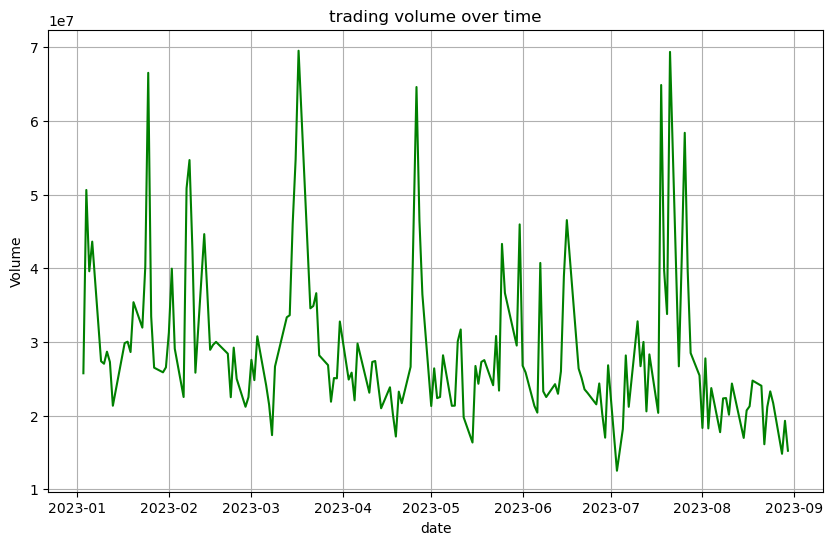

In [139]:
plt.figure(figsize = (10,6))
plt.plot(data.index,data['Volume'], color = 'green')
plt.xlabel('date')
plt.ylabel('Volume')
plt.title('trading volume over time')
plt.grid(True)
plt.show();

### Financial Metrics:

In [140]:
data['returns'] = data['Close'].pct_change()
data['cum_daily_return'] = (1 + data['returns']).cumprod() - 1
data['rolling_std'] = data['returns'].rolling(10).std()
data

,Open,High,Low,Close,Adj Close,Volume,moving_avg,returns,cum_daily_return,rolling_std
Date,,,,,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.956329,25740000,NaN,NaN,NaN,NaN
2023-01-04,232.279999,232.869995,225.960007,229.100006,227.547348,50623400,NaN,-0.043743,-0.043743,NaN
2023-01-05,227.199997,227.550003,221.759995,222.309998,220.803360,39585600,NaN,-0.029638,-0.072084,NaN
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.405609,43613600,NaN,0.011785,-0.061149,NaN
2023-01-09,226.449997,231.240005,226.410004,227.119995,225.580750,27369800,NaN,0.009736,-0.052008,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-24,332.850006,332.980011,319.959991,319.970001,319.970001,23281400,332.220998,-0.021498,0.335546,0.011832
2023-08-25,321.470001,325.359985,318.799988,322.980011,322.980011,21684100,331.478999,0.009407,0.348109,0.012092
2023-08-28,325.660004,326.149994,321.720001,323.700012,323.700012,14808500,330.744666,0.002229,0.351114,0.011721


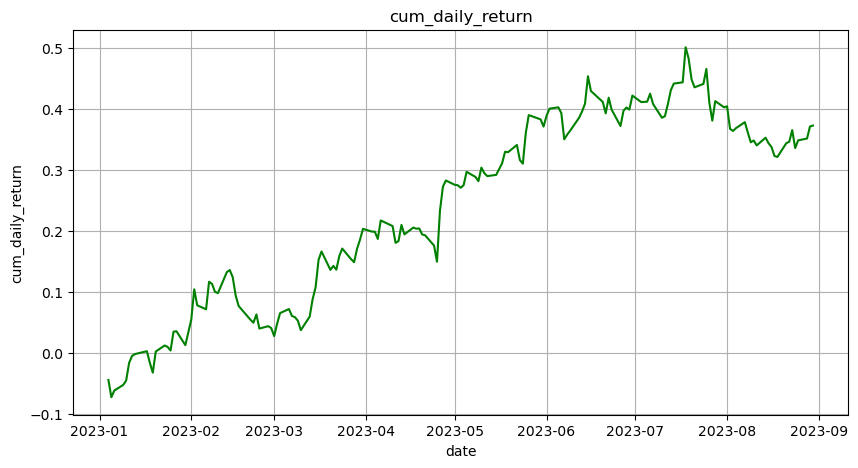

In [141]:
plt.figure(figsize = (10,5))
plt.plot(data.index,data['cum_daily_return'], color = 'green')
plt.xlabel('date')
plt.ylabel('cum_daily_return')
plt.title('cum_daily_return')
plt.grid(True)
plt.show();

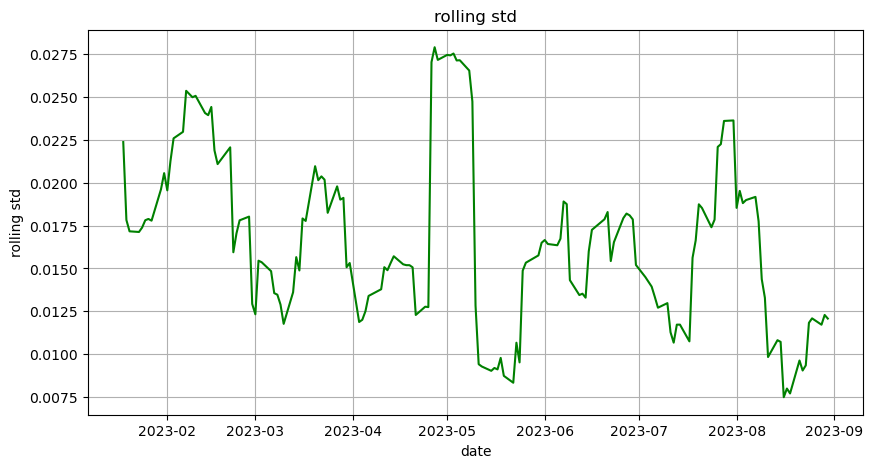

In [142]:
plt.figure(figsize = (10,5))
plt.plot(data.index,data['rolling_std'], color = 'green')
plt.xlabel('date')
plt.ylabel('rolling std')
plt.title("rolling std")
plt.grid(True)
plt.show();

### Correlation Analysis:

In [143]:
snp_data = yf.download('SPY','2023-01-01','2023-08-31')
snp_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,376.639587,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,379.547333,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,375.215393,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,383.819855,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,383.602295,73978100
...,...,...,...,...,...,...
2023-08-24,444.690002,445.220001,436.859985,436.890015,435.354370,88517300
2023-08-25,438.679993,441.299988,435.000000,439.970001,438.423523,102325100
2023-08-28,442.239990,443.399994,439.970001,442.760010,441.203735,61595400


In [144]:
snp_data['returns'] = snp_data['Close'].pct_change()
snp_data

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,376.639587,74850700,NaN
2023-01-04,383.179993,385.880005,380.000000,383.760010,379.547333,85934100,0.007720
2023-01-05,381.720001,381.839996,378.760010,379.380005,375.215393,76970500,-0.011413
2023-01-06,382.609985,389.250000,379.410004,388.079987,383.819855,104189600,0.022932
2023-01-09,390.369995,393.700012,387.670013,387.859985,383.602295,73978100,-0.000567
...,...,...,...,...,...,...,...
2023-08-24,444.690002,445.220001,436.859985,436.890015,435.354370,88517300,-0.013859
2023-08-25,438.679993,441.299988,435.000000,439.970001,438.423523,102325100,0.007050
2023-08-28,442.239990,443.399994,439.970001,442.760010,441.203735,61595400,0.006341


In [145]:
data['returns'].corr(snp_data['returns'])

0.6342500758141333

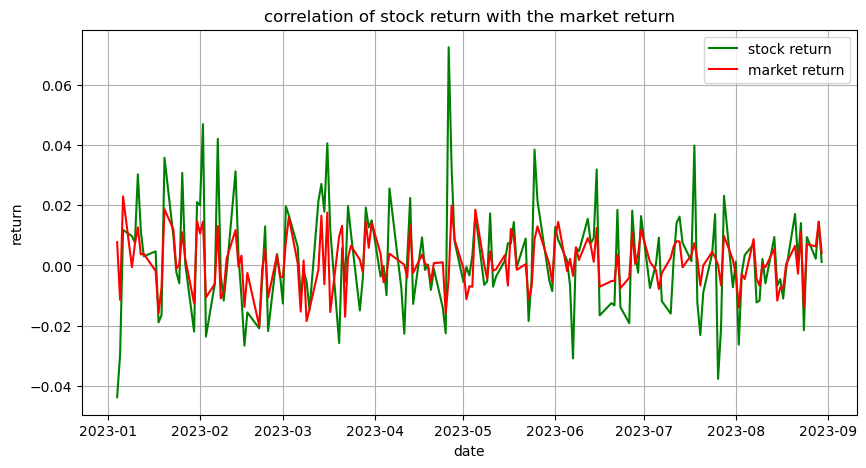

In [146]:
plt.figure(figsize = (10,5))
plt.plot(data.index,data['returns'], color = 'green',label = 'stock return')
plt.plot(snp_data.index,snp_data['returns'], color = 'red',label = 'market return')
plt.xlabel('date')
plt.ylabel('return')
plt.title('correlation of stock return with the market return')
plt.legend()
plt.grid(True)
plt.show();

### Conclusion:

In [147]:
#1)Plotting stock close price with time tells us about that the stock price has increased from 240 to around 330 
# over a period of 8 months from january to end of august with minor upwards and downwards movement.If someone has invested
#in the said period then the returns would have been 37.5%.
#2)There is positive correlation of .63 between the stock returns and S&P index.  
#3)Trading volume shows a lot of fluctuation with time. It means there were periods when the stock was actively bought and sold.